<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Class_Code/Intro_to_Comp_Statistics_Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Statistics (HSSP 2023 Edition)

Day 5: Creating your own research project

In [ ]:
# Pseudocode

# Import packages

# Load in data

# Select features
# Q: High school GPA and SAT scores vs. College GPA
# Features: High school GPA, SAT scores, College GPA
# Method: Linear regression

# Q: Number of years to graduate vs. other features
# Features: High school GPA, Parental level of education, Parental income, years to graduate
# Method: Linear regression, Analysis of variance?

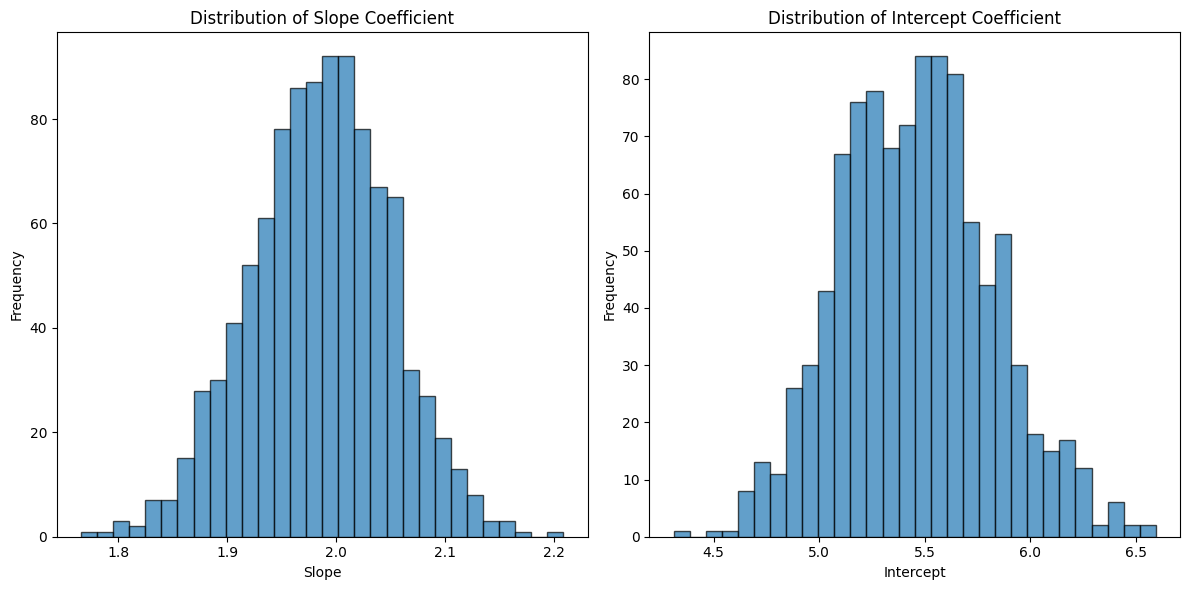

In [ ]:
# Code generated by ChatGPT to get a sense for what the solution code should look like
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_data(n_samples=100, true_slope=2, true_intercept=5, noise_std=2):
    np.random.seed(0)
    X = np.random.rand(n_samples, 1) * 10
    y = true_slope * X + true_intercept + np.random.randn(n_samples, 1) * noise_std
    return X, y

def bootstrap_linear_regression(X, y, n_bootstraps=1000):
    n_samples = X.shape[0]
    coef_samples = np.zeros((n_bootstraps, 2))

    for i in range(n_bootstraps):
        # Sample data with replacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_boot = X[indices]
        y_boot = y[indices]

        # Fit linear regression model on the bootstrapped sample
        model = LinearRegression()
        model.fit(X_boot, y_boot)

        # Save the coefficients of the current model
        coef_samples[i, 0] = model.coef_[0][0]
        coef_samples[i, 1] = model.intercept_[0]

    return coef_samples

def plot_coefficient_distributions(coef_samples):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(coef_samples[:, 0], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Slope')
    plt.ylabel('Frequency')
    plt.title('Distribution of Slope Coefficient')

    plt.subplot(1, 2, 2)
    plt.hist(coef_samples[:, 1], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Intercept')
    plt.ylabel('Frequency')
    plt.title('Distribution of Intercept Coefficient')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_data()

    # Perform bootstrap linear regression
    n_bootstraps = 1000
    coef_samples = bootstrap_linear_regression(X, y, n_bootstraps)

    # Plot the distribution of coefficients
    plot_coefficient_distributions(coef_samples)
